# Inputs
## Mahdiar Sadeghi
## Objective
This notebook is dedicated to understand how social distancing will effect the spread of an epidemic.
## Setup

Julia version 1.4.2

In [1]:
using Plots, Plots.PlotMeasures, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

## Utility functions

In [2]:
# change plot fonts
bplot(p) = plot!(p, titlefont=font(14, "Times")
    , ytickfont=font(12, "Times"), margin=5mm, annfont = font(12, "Times")
    , xtickfont = font(12, "Times"), legendfont = font(8, "Times"))

bplot (generic function with 1 method)

# Single Pulse Input

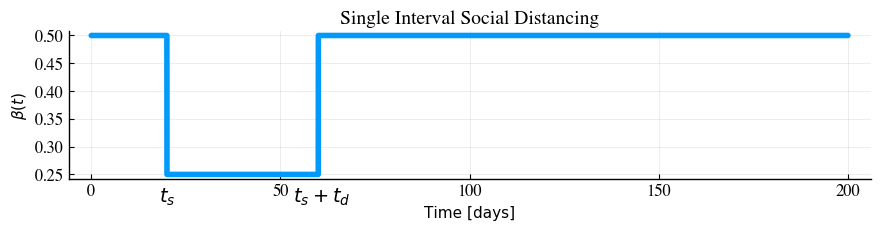

In [3]:
# this function will generate a T period of social distancing at time t0
sinput(t, t0, T) = if (t-t0<0 || t-t0-T>0) 0 else 1 end

# what was the input?
x = 0.:0.01:200
y = 0.5 .- 0.25 .* sinput.(x, 20., 40.)
p = plot(x, y, legend=false, linewidth=4, title="Single Interval Social Distancing", size=(900,250),
         xlabel="Time [days]", ylabel=L"\beta(t)", 
         ann=[(20, 0.21, L"t_s"), (61, 0.21, L"t_s+t_d")])
p = bplot(p)
savefig(p, "figures/SD.svg")
savefig(p, "figures/SD")

# Periodic Input

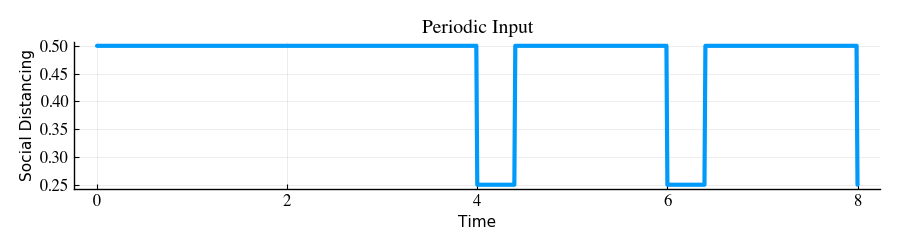

In [4]:
# this function will generate a periodic input with basic properties
# r the ratio between on and off state should be \in [0,1]
# T period of the input
# t0 start time of the policy
pinput(t, r, T, ts) = if t-ts<0 0 
    elseif r<=0 0 elseif r>=1 1
    elseif T<=0 0
    else 1-sign(floor(rem((t-ts)/T,1)/r)) end

# example of the periodic input
x = 0.:0.01:8
y = 0.5 .- 0.25 .*pinput.(x, 0.2, 2.0, 4.)
p = plot(x, y, legend=false, title="Periodic Input", linewidth=3, size=(900,250),
         xlabel="Time", ylabel="Social Distancing")
bplot(p)

# Periodic and Single Pulse Input

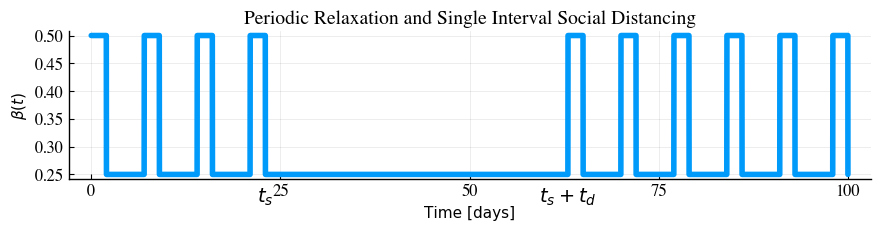

In [5]:
# this function will generate a periodic input with basic properties
# r the ratio between on and off state should be \in [0,1]
# T period of the input
# ts start time of the strict social distancing policy
# td duration of the social distancing
spinput(t, ts, td, r, T) = if (t-ts>0 && t-ts-td<0) 1 
    elseif r<=0 0 elseif r>=1 1
    elseif T<=0 0
    else sign(floor(rem(t/T,1)/r)) end

# what was the input?
x = 0.:0.01:100
y = 0.5 .- 0.25 .* spinput.(x, 23., 40., 2/7, 7)
p = plot(x, y, legend=false, linewidth=4, title="Periodic Relaxation and Single Interval Social Distancing", size=(900,250),
         xlabel="Time [days]", ylabel=L"\beta(t)", 
         ann=[(23, 0.21, L"t_s"), (63, 0.21, L"t_s+t_d")])
p = bplot(p)
savefig(p, "figures/Comb.svg")
savefig(p, "figures/Comb")

## Ratio Formula

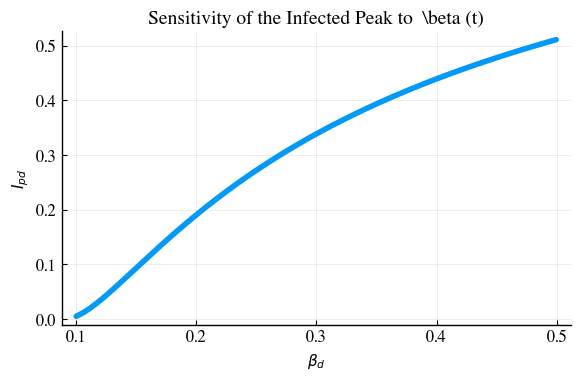

In [6]:
bn = 0.5
bd = (200:999).*bn./1000
gamma = 0.09
S0 = 1-1e-10
I0 = 1-S0

1 - (1+log(bn/gamma))*gamma/bn
id = 1 .- (1 .+ log.(S0 *bd./gamma))*gamma./bd
dn = 1 - (1+log(S0*bn/gamma))*gamma/bn

fig = plot( bd, id, linewidth=4, legend=false, title="Sensitivity of the Infected Peak to  \\beta (t)"
    , xlabel=L"\beta_d ", ylabel=L"I_{pd}")
fig = bplot(fig)

savefig(fig, "figures/beta.svg")
savefig(fig, "figures/beta")

# Provenance

In [7]:
using Dates
Dates.format(now(), "Y/U/d HH:MM")  

"2020/June/17 19:56"